In [1]:
import sys
from os import getcwd
from os.path import join
import pandas as pd
sys.path.insert(0, join(getcwd(), "../module_code"))

from data.load import load_data, load_outcomes
from cli_utils import load_cli_args, init_cli_args

sys.argv = [sys.argv[0]]
load_cli_args("../options.yml")
args = init_cli_args()

/home/davina/mambaforge/envs/crrt/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Outcomes

In [17]:
outcomes = load_outcomes(args.ucla_crrt_data_dir, ["IP_PATIENT_ID", "Start Date"])

mealy | INFO - *****Loading Outcomes...*****


In [18]:
granular_outcome = outcomes[["Recov. renal funct.", "Transitioned to HD", "Comfort Care", "Expired "]].idxmax(axis=1)
binary_outcome = outcomes["recommend_crrt"]

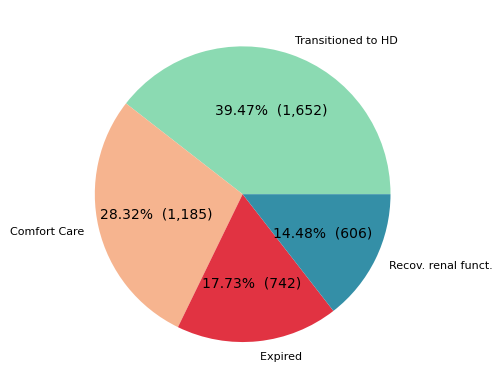

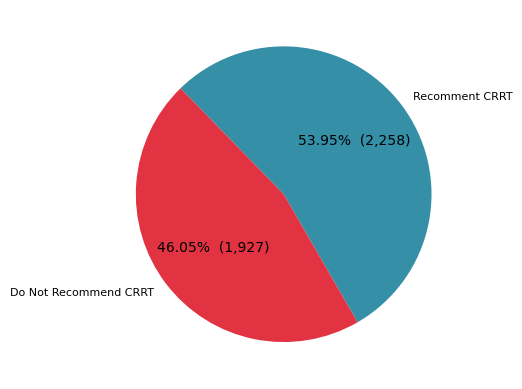

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
counts = granular_outcome.value_counts()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
plt.pie(
    counts,
    # autopct="%1.1f%%",
    labels=counts.index,
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    # https://seaborn.pydata.org/tutorial/color_palettes.html
    colors=[
        sns.color_palette("mako")[-1],
        sns.color_palette("rocket")[-1],
        sns.color_palette("rocket")[-3],
        sns.color_palette("mako")[-3],
    ]
)
plt.show()

counts = binary_outcome.value_counts()
# plt.pie(counts,  
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=["Recomment CRRT", "Do Not Recommend CRRT", ],
    colors=[
            sns.color_palette("mako")[-3],
            sns.color_palette("rocket")[-3],
    ],
    startangle=300
)
plt.show()

# Dataset

In [2]:
# preprocessed_df = load_data(args, "ucla_crrt")
ucla_control_df = load_data(args, "ucla_control")

mealy | INFO - *****Loading Static Features...*****
mealy | INFO - *****Loading Static Features...*****


# Patient Type

In [13]:
import upsetplot
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
def plot_upsetplot(preprocessed_df: pd.DataFrame, cohort: str):
    groups = ["heart", "liver", "infection"]
    fig = plt.figure(figsize=(10, 30))
    colnames =  [f"{name}_pt_indicator" for name in groups]
    indicator_cols = preprocessed_df[colnames].astype(bool)
    data = pd.concat([indicator_cols, preprocessed_df["recommend_crrt"]],axis=1).replace({0: "Do not recommend CRRT", 1: "Recommend CRRT"})
    myplot = upsetplot.UpSet(data.set_index(colnames), intersection_plot_elements=0, show_counts=True, show_percentages=True, element_size=50)
    myplot.add_stacked_bars(by="recommend_crrt", colors=cm.Set2, elements=10)
    myplot.plot()
    plt.title(f"{cohort} Patient Type Breakdown")
    plt.show()

<Figure size 1000x3000 with 0 Axes>

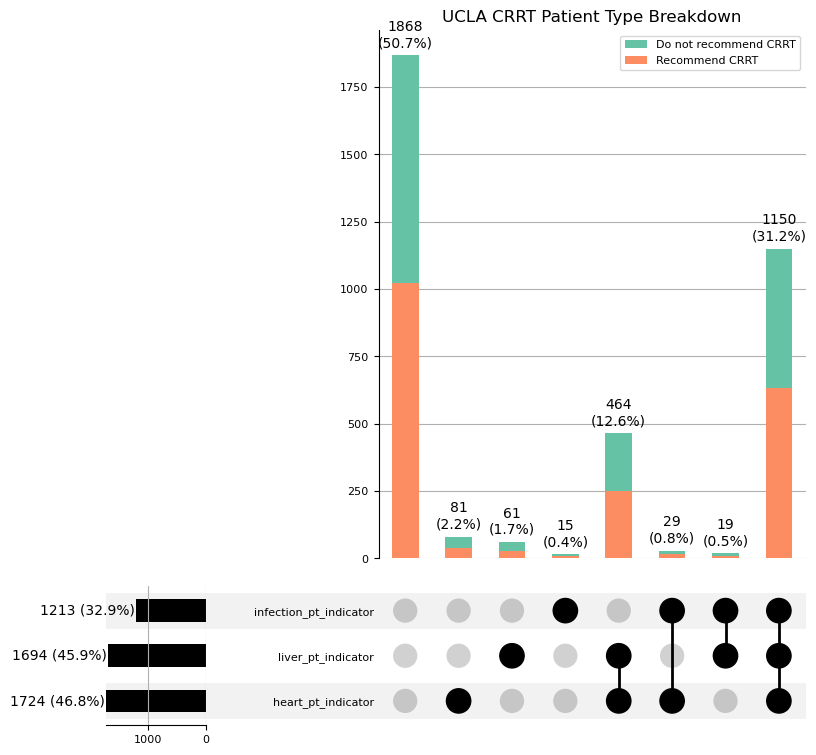

<Figure size 1000x3000 with 0 Axes>

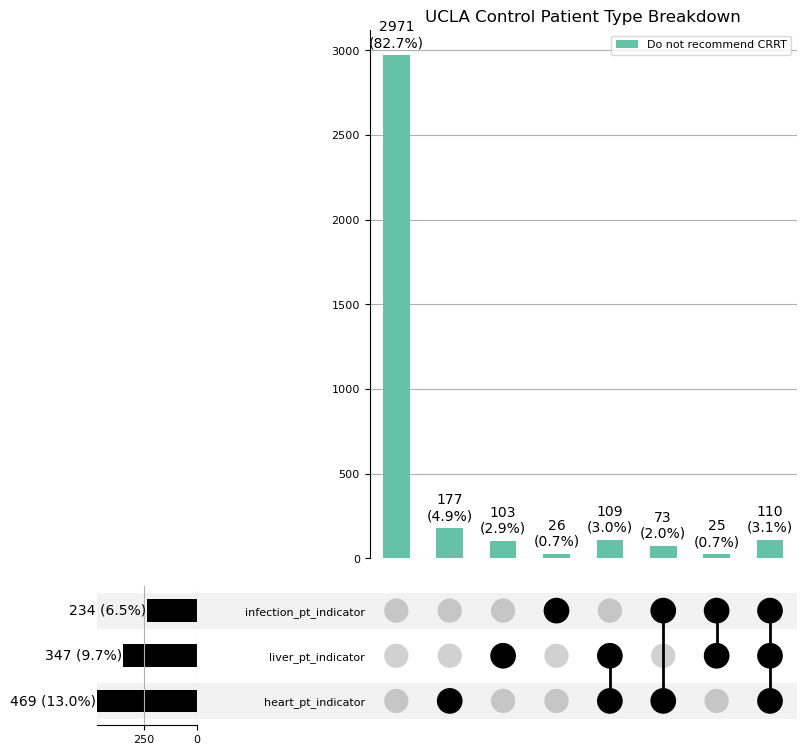

In [14]:
plot_upsetplot(preprocessed_df, "UCLA CRRT")
plot_upsetplot(ucla_control_df, "UCLA Control")

## Numerical Breakdown

In [15]:
myplot.total

NameError: name 'myplot' is not defined

In [ ]:
print(preprocessed_df["recommend_crrt"].value_counts())
print(preprocessed_df["recommend_crrt"].value_counts(normalize=True)*100)

1    2106
0    1791
Name: recommend_crrt, dtype: int64
1    54.04157
0    45.95843
Name: recommend_crrt, dtype: float64


In [ ]:
from IPython.display import display
for table in [myplot.totals, myplot.intersections]:
    display(pd.concat([table.rename("N"), (table/myplot.total*100).rename("%")], axis=1), )

,N,%
liver_pt_indicator,2062,52.912497
heart_pt_indicator,2060,52.861175
infection_pt_indicator,1416,36.335643


N          %
liver_pt_indicator heart_pt_indicator infection_pt_indicator                 
False              False              False                   1712  43.931229
True               False              False                     72   1.847575
False              True               False                     77   1.975879
                   False              True                      20   0.513215
True               True               False                    620  15.909674
                   False              True                      33   0.846805
False              True               True                      26   0.667180
True               True               True                    1337  34.308442

In [ ]:
df = myplot._df.set_index("recommend_crrt", append=True, drop=False)
gb = df.groupby(level=list(range(df.index.nlevels)), sort=True)
counts = gb.size()
# percents = counts / df.groupby(level=list(range(df.index.nlevels - 2)), sort=True) * 100
percents = counts / myplot.intersections * 100
pd.concat([counts.rename("N"), percents.rename("%")], axis=1)

N  \
liver_pt_indicator heart_pt_indicator infection_pt_indicator recommend_crrt               
False              False              False                  Do not recommend CRRT  782   
                                                             Recommend CRRT         930   
                                      True                   Do not recommend CRRT    7   
                                                             Recommend CRRT          13   
                   True               False                  Do not recommend CRRT   38   
                                                             Recommend CRRT          39   
                                      True                   Do not recommend CRRT   12   
                                                             Recommend CRRT          14   
True               False              False                  Do not recommend CRRT   39   
                                                             Recommend CRRT          33   
                                      True                   Do not recommend CRRT   20   
                                                             Recommend CRRT          13   
                   True               False                  Do not recommend CRRT  308   
                                                             Recommend CRRT         312   
                                      True                   Do not recommend CRRT  585   
                                                             Recommend CRRT         752   

                                                                                            %  
liver_pt_indicator heart_pt_indicator infection_pt_indicator recommend_crrt                    
False              False              False                  Do not recommend CRRT  45.677570  
                                                             Recommend CRRT         54.322430  
                                      True                   Do not recommend CRRT  35.000000  
                                                             Recommend CRRT         65.000000  
                   True               False                  Do not recommend CRRT  49.350649  
                                                             Recommend CRRT         50.649351  
                                      True                   Do not recommend CRRT  46.153846  
                                                             Recommend CRRT         53.846154  
True               False              False                  Do not recommend CRRT  54.166667  
                                                             Recommend CRRT         45.833333  
                                      True                   Do not recommend CRRT  60.606061  
                                                             Recommend CRRT         39.393939  
                   True               False                  Do not recommend CRRT  49.677419  
                                                             Recommend CRRT         50.322581  
                                      True                   Do not recommend CRRT  43.754675  
                                                             Recommend CRRT         56.245325

# MISSING Data

In [3]:
tmp_df = preprocessed_df.drop(preprocessed_df.columns[preprocessed_df.columns.str.contains("^Unnamed")], axis=1)
def print_missing_info(filter = None):
    if filter is not None:
        total_notmissing = sum(~tmp_df[filter].isna().any(axis=1))
    else:
        total_notmissing = sum(~tmp_df.isna().any(axis=1))
    print(f"Number of patients not missing any data: {total_notmissing}, ({total_notmissing/tmp_df.shape[0] * 100}%)")
print("All")
print_missing_info()

All
Number of patients not missing any data: 0, (0.0%)


In [15]:
(tmp_df.drop(["infection_pt_indicator", "liver_pt_indicator", "heart_pt_indicator", "recommend_crrt", "CRRT Year"], axis=1).isna().mean() * 100).sort_values()

# column_mask = pd.read_pickle(join("/home/davina/Private/repos/CRRT", "local_data","data_transform.pkl")).__self__.named_steps[
#                 "feature-selection"
#             ].get_support()
column_mask = pd.read_pickle(join("/home/davina/Private/repos/CRRT", "selected_columns.pkl"))

# tmp_df[tmp_df.drop("recommend_crrt",axis=1).columns[column_mask]].drop(["infection_pt_indicator", "liver_pt_indicator", "heart_pt_indicator"], axis=1)

amount_missing = tmp_df.drop("recommend_crrt",axis=1)[column_mask].isna().mean().sort_values()
amount_missing.name = "% Missing"
amount_missing.index.name = "Variables"
(amount_missing*100).to_csv(join("/home/davina/Private/repos/CRRT", "variables_and_amount_missing.csv"))
amount_missing

Variables
CRRT Year                                 0.000000
PHARM_SUBCLASS_Chlorine Antiseptics       0.062754
PHARM_SUBCLASS_Cobalamins                 0.062754
PHARM_SUBCLASS_Coumarin Anticoagulants    0.062754
PHARM_SUBCLASS_Diagnostic Drugs           0.062754
                                            ...   
HTLV I DNA_len                            0.999730
17-OH-PREGNENOLONE_max                    1.000000
IONIZED CALCIUM(NON-PATIENT)_max          1.000000
LACTATE/PYRUVATE RATIO_mean               1.000000
17-OH-PREGNENOLONE_min                    1.000000
Name: % Missing, Length: 2045, dtype: float64

In [ ]:
tmp_df[tmp_df.columns[tmp_df.columns.str.contains("_na")]].mean()

dx_CCS_CODE_na    0.824272
pr_CCS_CODE_na    0.134976
CPT_SECTION_na    6.061033
dtype: float64

In [ ]:
import pandas as pd
percent_missing_per_feature = tmp_df.isna().sum() / tmp_df.shape[0] * 100
percents = pd.Series([10, 25, 50], name=">= Percent Missing")
counts = pd.Series([(percent_missing_per_feature >= (p/100)).sum() for p in percents])

pd.DataFrame(counts, index=percents)

,0
>= Percent Missing,
10,NaN
25,NaN
50,NaN
